CAPÍTULO 10 - Operações groupby: separar-aplicar-combinar
-


Operações em grupo são um método eficaz de agregar, transformar e filtrar dados. Elas se baseiam no mantra "separar-aplicar-combinar".

1 - Os dados são separados em partes com base em uma ou mais chaves.  
2 - Uma função é aplicada em cada parte.   
3 - Os resultados de cada parte são combinados a fim de criar um novo conjunto de dados

As técnicas exibidas neste capítulo podem ser todas aplicados sem o uso do groupby, porém usar instruções groupby poderá ser mais rapido se quisermos criar vários grupos e facilita o trabalho com conjuntos maiores de dados

10.2 Agregação

A agregação é o processo de transformar vários valores em um único valor, um exemplo para isso é média aritimética

10.2.1 Agregação básica com agrupamento de uma única variavel

As vezes agregação pode ser chamada de sumarização, os dois termos índicam que de alguma forma a redução de dados está envolvida

In [108]:
import pandas as pd
df = pd.read_csv('../../data/gapminder.tsv', sep='\t')

#calcula a expectativa de média para cada ano
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()

print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [109]:
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


A instrução anterior usa a notação de ponto para obter subconjuntos da coluna lifeExp; é exatamente o mesmo que obter um subconjunto usando a notação de colchetes

In [110]:
avg_life_exp_by_year = df.groupby('year')['lifeExp'].mean()

print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


Podemos pensar nas intruções groupby como a criação de um subconjunto de cada valor único de uma coluna. Por exemplo poderíamos obter uma lista de valores únicos da coluna

In [111]:
years = df.year.unique()

print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


Podemos percorrer os anos e obter um subconjunto dos dados

In [112]:
#obtém um subconjunto dos dados do ano 1977
y1977 = df.loc[df.year == 1977, :]

print(y1977.head())

        country continent  year  lifeExp       pop     gdpPercap
5   Afghanistan      Asia  1977   38.438  14880372    786.113360
17      Albania    Europe  1977   68.930   2509048   3533.003910
29      Algeria    Africa  1977   58.014  17152804   4910.416756
41       Angola    Africa  1977   39.483   6162675   3008.647355
53    Argentina  Americas  1977   68.481  26983828  10079.026740


Por fim, podemos execultar uma função nos dados do subconjunto

In [113]:
y1977_mean = y1977.lifeExp.mean()

print(y1977_mean)

59.57015746478874


O método groupby basicamente repete esse processo por todo o DataFrame de forma conveniente.   


E claro que há muitos outros métodos que podem ser usados com groupby 

10.2.2 Métodos de agregação embutidos

*No livro tem uma tabela com todos os métodos embutidos do Pandas que podem ser usados para agregar dados

Por exemplo podemos calcular várias estátisticas resumidas com describe

In [114]:
#agrupa por continente e descreve cada grupo
continent_describe = df.groupby('continent').lifeExp.describe()

print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


10.2.3 Funções de agregação

Também podemos usar uma função de agregação que não está listada na tabela. Em vez de chamar o método de agregação, podemos chamar o método agg ou aggregate e lhe passar a função de agregação que queremos usar. Ao usar agg ou aggregate usaremos as funções listadas na coluna "função do numpy/scipy"

10.2.3.1 funções de outras bibliotecas

In [115]:
import numpy as np

cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)

print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_7344\631682429.py:3: FutureWarning: The provided callable <function mean at 0x00000275B06E1760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)


agg e aggrate fazem o mesmo

In [116]:
cont_le_agg = df.groupby('continent').lifeExp.aggregate(np.mean)

print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_7344\3225759254.py:1: FutureWarning: The provided callable <function mean at 0x00000275B06E1760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cont_le_agg = df.groupby('continent').lifeExp.aggregate(np.mean)


10.2.3.2 Funções de usuário personalizadas

Também podemos passar uma função que nós mesmos criamos. Para isso basta usar agg ou aggregate

In [117]:
def myMean(values):
    n = len(values)

    sum = 0

    for value in values:
        sum += value

    return (sum / n)


In [118]:
agg_my_mean = df.groupby('continent').lifeExp.aggregate(myMean)

print(agg_my_mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


Podemos também escrecver funções que aceitem vários parâmetros, desde que o primeiro aceiet a Series de valores do DataFrame.

In [119]:
def myMeanDiff(values, diffValue):

    n = len(values)
    sum = 0
    for value in values:
        sum+= value
    mean = sum / n
    return(mean - diffValue)

global_mean = df.lifeExp.mean()
print(global_mean)

59.474439366197174


In [120]:
agg_mean_diff = df.groupby('year').lifeExp.aggregate(myMeanDiff, diffValue=global_mean)

print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


10.2.4 Várias funções simultaneamente

Se quisermos usar várias funções de agregação podemos passar uma lista de lista de funções passar agg ou aggregate

In [121]:
#calcula o contador, a média e o desvio-padrão de lifeExp por ano
gdf = df.groupby('year').lifeExp.aggregate([np.count_nonzero,  np.mean, np.std])

print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


C:\Users\User\AppData\Local\Temp\ipykernel_7344\1120763757.py:2: FutureWarning: The provided callable <function mean at 0x00000275B06E1760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gdf = df.groupby('year').lifeExp.aggregate([np.count_nonzero,  np.mean, np.std])
C:\Users\User\AppData\Local\Temp\ipykernel_7344\1120763757.py:2: FutureWarning: The provided callable <function std at 0x00000275B06E18A0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  gdf = df.groupby('year').lifeExp.aggregate([np.count_nonzero,  np.mean, np.std])


10.2.5 Usando um dicionário em agg/aggregate

Outro maneira de aplicar funções nos métodos agg e agregate é passar um dicionário python

10.2.5.1 Em um DataFrame

Ao passar um dict em um DataFrame agrupadp, as chaves serão as colunas e os valores as funções usadas nos cálculos agregados.

In [122]:
gdf_dict = df.groupby('year').agg({
    'lifeExp': 'mean',
    'pop': 'median',
    'gdpPercap': 'median'
})

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


10.2.5.2 Em uma Series

Não é possível passar um dict para uma Series. Caso queiramos colocar nós mesmos nomear colunas de Series agrupados precisamos fazer a agregação primeiro e só depois renomear

In [123]:
gdf = df.groupby('year').lifeExp.aggregate([np.count_nonzero,
                                            'mean',
                                            'std']).\
                                            rename(columns={'count_nonzero': 'count',
                                                            'mean': 'avg',
                                                            'std': 'std_dev'}).reset_index()

print(gdf)

    year  count        avg    std_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


10.3 Transformação

Quando transformamos dados, passamos os valores de nosso dataframe para a função, e ela transformará os dados.  
Diferente do aggregate que pode aceitar diversos valores e devolver um único valor, transoform aceita diversos valores e devolve de um para um

10.3.1 Exemplo com escore z

Vamos calcular o escore z (z-score) de nossos dados de expectativa de vida por ano.  
O escore z identifica o número de desvios-padrões a partir da média de nossos dados. Ele centraliza nossos dados em torno de 0 com um desvio-padrão de 1. Essa técnica padroniza os dados e facilita comparar variáveis diferentes umas com as outras.

In [124]:
def my_zscore(x):
    """Calcula o escore z dos dados fornecido;
    'x' é um vetor ou uma série de valores.
    """

    return ((x - x.mean()) / x.std())

Podemos usar essa função agora para transformar nossos dados por grupo

Observe que o número de linhas do dataframe e de transform_z é o mesmo

In [125]:
transform_z = df.groupby('year').lifeExp.transform(my_zscore)

print(df.shape)
print(gdf.shape)
print(transform_z.shape)

(1704, 6)
(12, 4)
(1704,)


In [126]:
print(transform_z)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64


A biblioteca scipy tem o próprio zscore

In [127]:
from scipy.stats import zscore

sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)

#calcula um zscore sem agrupamento
sp_z_nongroup = zscore(df.lifeExp)

In [128]:
print(transform_z.head())


0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [129]:
print(sp_z_grouped)

0      -1.662719
1      -1.737377
2      -1.792867
3      -1.854699
4      -1.900878
          ...   
1699   -0.081910
1700   -0.338167
1701   -1.580537
1702   -2.100756
1703   -1.955077
Name: lifeExp, Length: 1704, dtype: float64


In [130]:
print(sp_z_nongroup)

0      -2.375334
1      -2.256774
2      -2.127837
3      -1.971178
4      -1.811033
          ...   
1699    0.222759
1700    0.069894
1701   -0.980805
1702   -1.508942
1703   -1.238058
Name: lifeExp, Length: 1704, dtype: float64


10.3.1.1 Exemplo com valores ausentes

Preencher conjuntos de dados que possuam dados ausente com a média da coluna pode fazer sentido em alguns casos, já em outras pode fazer mais sentido preencher os dados ausentes com base em um grupo específico.

In [131]:
import seaborn as sns
import numpy as np

#define a semente para que os resultados sejam determinísticos
np.random.seed(42)

#amostra 10 linhas de tips
tips_10 = sns.load_dataset('tips').sample(10)

#escolhe aleatoriamente 4 valores de 'total_bill' e os transforma em ausentes
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN

print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


Podemos usar a instrução groupby a fim de calcular uma estatística para preencher os valores ausentes. Primeiro vamos contar os valores não ausentes por sex

In [132]:
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3


C:\Users\User\AppData\Local\Temp\ipykernel_7344\4241220118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_sex = tips_10.groupby('sex').count()


Temos três valroes ausentes para Male e três para Famale. Vamos calcular uma média agrupada e usa-lá para preencher os valores ausentes

In [133]:
def fill_na_mean(x):
    """Devolve a média de um vetor
    """

    avg = x.mean()
    return(x.fillna(avg))

#calcula um total bill médio por sex
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

#faz a atribuição a total bill
tips_10['fill_total_bill'] = total_bill_group_mean

C:\Users\User\AppData\Local\Temp\ipykernel_7344\2257601137.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)


In [134]:
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


In [135]:
print(tips_10[['sex', 'total_bill', 'fill_total_bill']])

        sex  total_bill  fill_total_bill
24     Male       19.82          19.8200
6      Male        8.77           8.7700
153    Male         NaN          17.9525
211    Male         NaN          17.9525
198  Female         NaN          13.9300
176    Male         NaN          17.9525
192    Male       28.44          28.4400
124  Female       12.48          12.4800
9      Male       14.78          14.7800
101  Female       15.38          15.3800


10.4 Filtragem

O último tipo de ação que podemos fazer com o método groupby é a filtragem. Ela permite separar seus dados por chaves e então obter algum tipo de valor booleano

Vamos usar o conjunto tips completo para verificar o número de observações para diversos valores de size

In [136]:
tips = sns.load_dataset('tips')
print(tips.shape)

#observa os contadores de frequência para o tamanho da mesa
print(tips['size'].value_counts())

(244, 7)
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


Na saída podemos observar que messas de 5, 1 e 6 pessoas não são muito frequentes, então talvez queiramos desconssiderar esse valores e manter apenas os com 30 ou mais

Para isso podemos usar o método filter em uma operação com agrupamento

In [137]:
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() >= 30)

print(tips_filtered.shape)

(231, 7)


In [138]:
print(tips_filtered['size'].value_counts())

size
2    156
3     38
4     37
Name: count, dtype: int64


10.5 Objetos pandas.core.groupby.DataFrameGroupBy

Nesta seção veremos um pouco mais dos objetos agrupados.

10.5.1 Grupos

Nós encadeamos diretamente os métodos aggregate, transform e filter diretamente com o groupby,  
porém podemos salvar os resultados de groupby antes de execultar esses outros métodos

In [139]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [140]:
#salvendo somento o objeto groupby
grouped = tips_10.groupby('sex', observed=False)
print(grouped)

Internamente nada foi calculado ainda, pois não execultamos nenhuma ação que exija um cálculo. Se quisermos ver os grupos calculados, podemos chamar o método groups

In [141]:
#vê realmente os grupos de groupby; somente o índicie é devolvido 
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


Essa abordagem permite nos salvar os dados agrupados, graças a isso você pode execultar várias operações de aggregate, transform ou index sem processar novamente as instruções de groupby

10.5.2 Cálculos com grupos envolvendo diversaas variáveis

"""Um dos aspectos mais interessantes de Python, é que ele usa o mantra EAFP: It's easier to ask for forgiveness than for permission(é mais fácil pedir perdão do que permisão).  
Ao longo do capítulo fizemos cáculos com groupby em uma única coluna, no entanto se especificarmos o cálculo que queremos logo depois de groupby, Python fará o cálculo em todas as colunas e silenciosamente descatará o restante."""  
Isso antigamente, agora já não acontece mais.

Aqui o exemplo de uma média agrupada em todas as colunas númericas de acordo com sex. OBS: se passar o dataframe inteiro sem selecionar colun as númericas causará erro.

In [142]:
avgs = grouped[['tip', 'total_bill', 'size']].mean()
print(avgs)

             tip  total_bill      size
sex                                   
Male    2.875714       20.02  2.571429
Female  2.506667       13.62  2.000000


10.5.3 Selecionando um grupo

Se quisermos extrair um grupo em particuçar podemos usar o método get_group e passar o grupo desejado

In [143]:
#obtém o grupo 'Female'
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


10.5.4 Iterando nos grupos

Outra vantagem de salvar somente o objeto groupby é que você pode iterar pelos grupos individualmente.

É possívle iteras pelos valroes de grouped assim como fazemos com qualquer outro cotêiner python.

In [144]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


Se tentar obter o primeiro índicie de um objeto grouped verá o erro

In [145]:
#não é realmente possível obter o elemento 0 do objeto grouped
"""print(grouped[0])"""

'print(grouped[0])'

Por enquanto vamos modificar o laço for para mostrar apenas o primeiro elemento, junto com outras informações obtidas quando percorremos o objeto grouped com um laço

In [146]:
for sex_group in grouped:
    #obté, o tipo do objeto (tupla)
    print(f'the type is: {type(sex_group)}', '\n')

    #obtém o tamnho do objeto
    print(f'the length is : {len(sex_group)}', '\n')

    #obtém o primeiro elemento
    print(f'the first elemen is: {sex_group[0]}', '\n')

    #obtém o tipo do segundo elemento
    print(f'it has a type of: {type(sex_group[0])}', '\n')

    #obtém o segundo elemento
    print(f'the second element is: {sex_group[1]}', '\n')

    #obtém o tipo do segundo elemento
    print(f'it has type of: {type(sex_group[1])}', '\n')

    #exibe o que temo
    print('what we have:')
    print(sex_group)

    break

the type is: <class 'tuple'> 

the length is : 2 

the first elemen is: Male 

it has a type of: <class 'str'> 

the second element is:      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2 

it has type of: <class 'pandas.core.frame.DataFrame'> 

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.

10.5.5 Vários grupos

Podemos passar mais de uma váriavel na instrução groupby !

In [147]:
#média por sex e time
bill_sex_time = tips_10.groupby(['sex', 'time'], observed=False)

groupAvg = bill_sex_time[['total_bill', 'tip', 'size']].mean()
print(groupAvg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


10.5.6 Obtendo resultados planos

In [148]:
print(type(groupAvg))

<class 'pandas.core.frame.DataFrame'>


Podemos ver que groupAvg é um dataframe, porém com algo estranho, existe algumas lacunas vazias no dataframe. Vamos observar o index

In [149]:
print(groupAvg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


Se quisermos uma dataframe usual planal (flat), é possível chamar o método reset_index.

In [150]:
groupMethod = groupAvg.reset_index()
print(groupMethod)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


ou simplesmente passar o parâmetro as_index=False no groupby

In [153]:
#selected_dtypes seleciona os tipos dos dados das colunas em que a função mean será aplicada
groupParam = tips_10.groupby(['sex', 'time'], as_index=False, observed=False)[tips_10.select_dtypes(include='number').columns].mean()
print(groupParam)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


10.6 Trabalhando com MultiIndex

In [157]:
intv_df = pd.read_csv('../../data/epi_sim.txt')

(9434653, 6)


In [160]:
print(intv_df.shape,'\n')
print(intv_df.head())

(9434653, 6) 

   ig_type  intervened        pid  rep  sid        tr
0        3          40  294524448    1  201  0.000135
1        3          40  294571037    1  201  0.000135
2        3          40  290699504    1  201  0.000135
3        3          40  288354895    1  201  0.000135
4        3          40  292271290    1  201  0.000135


Vamos contar o número de intervenções em cada replicação, o tempo de intervenção e o valor do tratamento

In [162]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()

print(count_only.head(10))

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64


Agora que já usamos count, podemos passar mean para calcular a média. Contudo nossa instrução gourpby não devolve um dataframe plano.

In [163]:
print(type(count_only))

<class 'pandas.core.series.Series'>


Ao invés disso, o resultado tem a forma de um a serie com vários índicies. Se quisermos execultar outra operação groupby, será nescessário passar o parâmetro levels para referenciar os vários níveis de índicies

In [169]:
count_mean = count_only.groupby(level=[0,1,2]).mean()

print(count_mean.head(10))

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
     12          0.000152    3.0
                 0.000166    5.0
     13          0.000152    1.0
                 0.000166    3.0
     14          0.000152    3.0
Name: ig_type, dtype: float64


In [173]:
#podemos combinar tudo num só comando
count_mean = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count().\
                    groupby(level=[0,1,2]).mean().reset_index()

print(count_mean)

      rep  intervened        tr  ig_type
0       0           8  0.000166      1.0
1       0           9  0.000152      3.0
2       0           9  0.000166      1.0
3       0          10  0.000152      1.0
4       0          10  0.000166      1.0
...   ...         ...       ...      ...
1191    2         193  0.000135      1.0
1192    2         193  0.000152      1.0
1193    2         195  0.000135      1.0
1194    2         198  0.000166      1.0
1195    2         199  0.000135      1.0

[1196 rows x 4 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

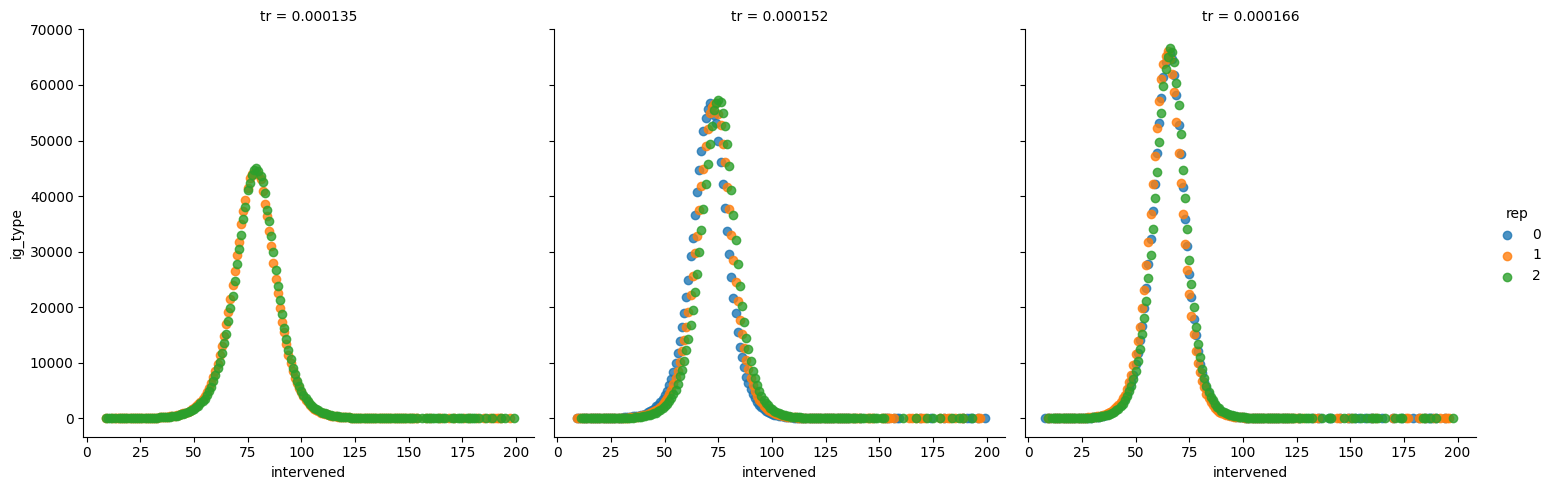

In [175]:
import matplotlib.pyplot as plt

fig = sns.lmplot(data=count_mean, x='intervened', y='ig_type', hue='rep',
                 col='tr', fit_reg=False)

plt.show

O exemplo anterior mostrou como podemos passar um level para fazer um cáculo adicional com groupby. Posições inteiras foram usadas, mas podemos também passar a string do nível para deixar nosso código um pouco mais legível

<function matplotlib.pyplot.show(close=None, block=None)>

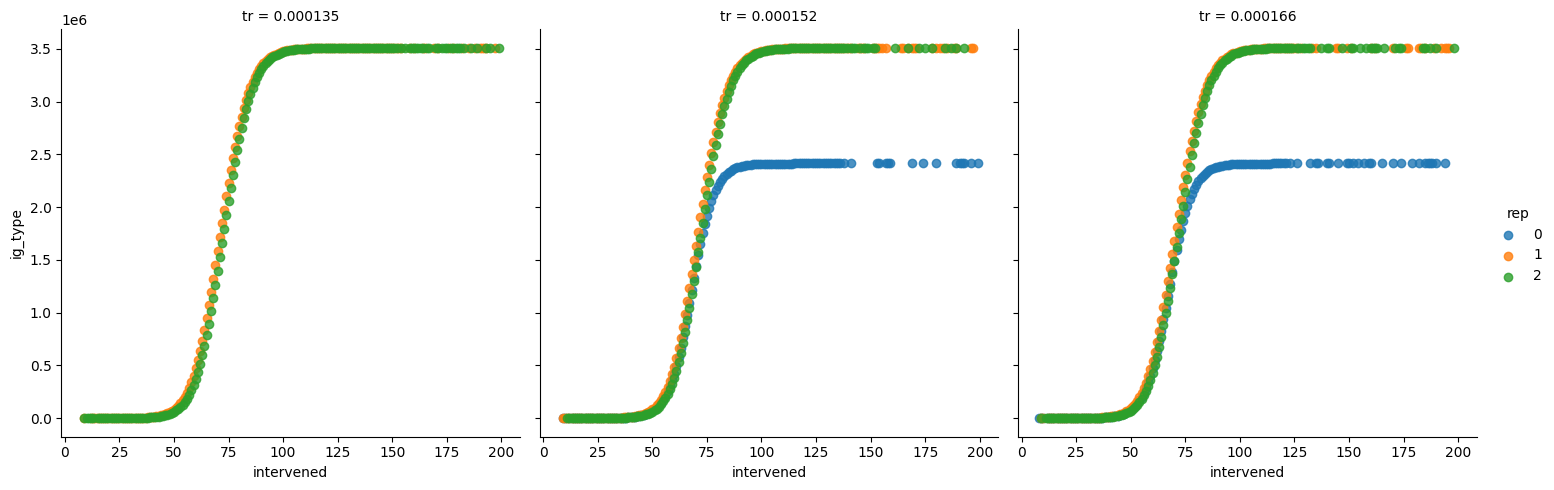

In [181]:
cumulativeCount = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count().\
                        groupby(level=['rep']).cumsum().reset_index()

fig = sns.lmplot(data=cumulativeCount, x='intervened', y='ig_type',
                 hue='rep', col='tr', fit_reg=False)

plt.show